# Customer Segmentation and Analysis

In [1]:
library(lattice)
library(flexclust)
library(MSA)
library(cluster)



Loading required package: grid

Loading required package: modeltools

Loading required package: stats4



In [2]:

## First step is to read in the data in R
vac <- read.csv("Australian_Travel_Motives.csv",check.names = FALSE)


## We will then review the column names of the dataset
colnames(vac)

[1] "Gender"                            "Age"                              
 [3] "Education"                         "Income"                           
 [5] "Income2"                           "Occupation"                       
 [7] "State"                             "Relationship.Status"              
 [9] "Obligation"                        "Obligation2"                      
[11] "NEP"                               "Vacation.Behaviour"               
[13] "rest and relax"                    "luxury / be spoilt"               
[15] "do sports"                         "excitement, a challenge"          
[17] "not exceed planned budget"         "realise creativity"               
[19] "fun and entertainment"             "good company"                     
[21] "health and beauty"                 "free-and-easy-going"              
[23] "entertainment facilities"          "not care about prices"            
[25] "life style of the local people"    "intense experience of nature"     
[27] "cosiness/familiar atmosphere"      "maintain unspoilt surroundings"   
[29] "everything organised"              "unspoilt nature/natural landscape"
[31] "cultural offers"                   "change of surroundings"

In [3]:
## we will then check the dimension of the dataset

dim(vac)

[1] 1000   32

In [4]:
## step 2: We will conduct a summary of the first five columns

summary(vac[,c(1,2,3,4,5)])

    Gender               Age           Education        Income         
 Length:1000        Min.   : 18.00   Min.   :1.000   Length:1000       
 Class :character   1st Qu.: 32.00   1st Qu.:3.000   Class :character  
 Mode  :character   Median : 42.00   Median :6.000   Mode  :character  
                    Mean   : 44.17   Mean   :4.814                     
                    3rd Qu.: 57.00   3rd Qu.:7.000                     
                    Max.   :105.00   Max.   :8.000                     
                                     NA's   :8                         
   Income2         
 Length:1000       
 Class :character  
 Mode  :character  
                   
                   
                   
                   

## Data Cleaning


In [5]:
## Conducting a summary of Income2 we find that the categories are not sorted in order
## The categories can be re-ordered as shown below
inc2 <- vac$Income2
levels(inc2)

NULL

In [6]:
## first we store the levels in a helper variable and find the correct re-ordering of the levels

lev <- levels(inc2)

lev[c(1,3,4,5,2)]

NULL

In [7]:
## we will then convert variable into an ordinal varibale(an ordered factor in R)

inc2 <- factor(inc2,levels= lev[c(1,3,4,5,2)], ordered = TRUE)

In [8]:
## we will then double check that the transformation was implemented correctly

table(orig = vac$Income2,new = inc2)

< table of extent 5 x 0 >

In [9]:
## we then overwrite the original column of the data

vac$Income2 <- inc2

## Descriptive Analysis

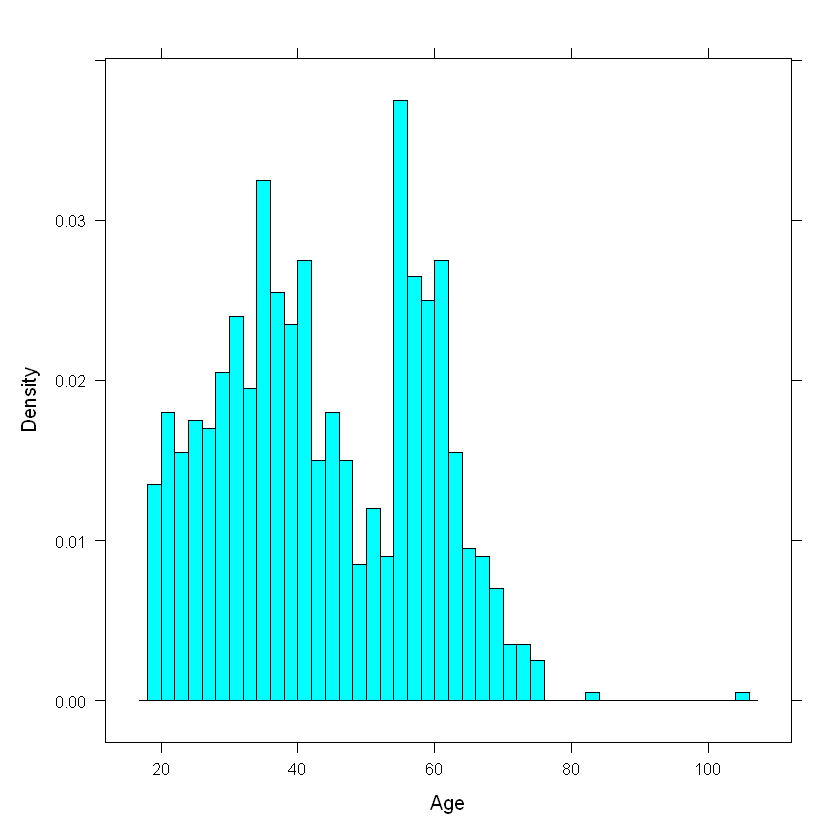

In [10]:
## Plotting a histogram of the age column 

histogram(~ Age,data = vac,breaks = 40,type = "density")

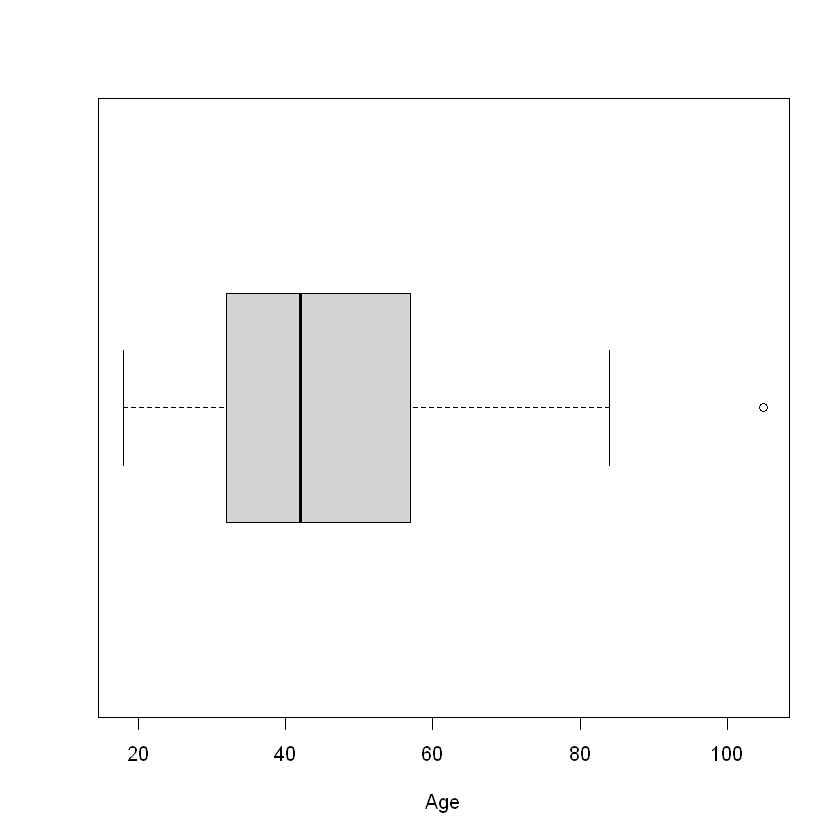

In [11]:
## plotting a boxplot of the age column
## we can observe the one outlier present in the dataset

boxplot(vac$Age, horizontal = TRUE ,xlab = "Age")

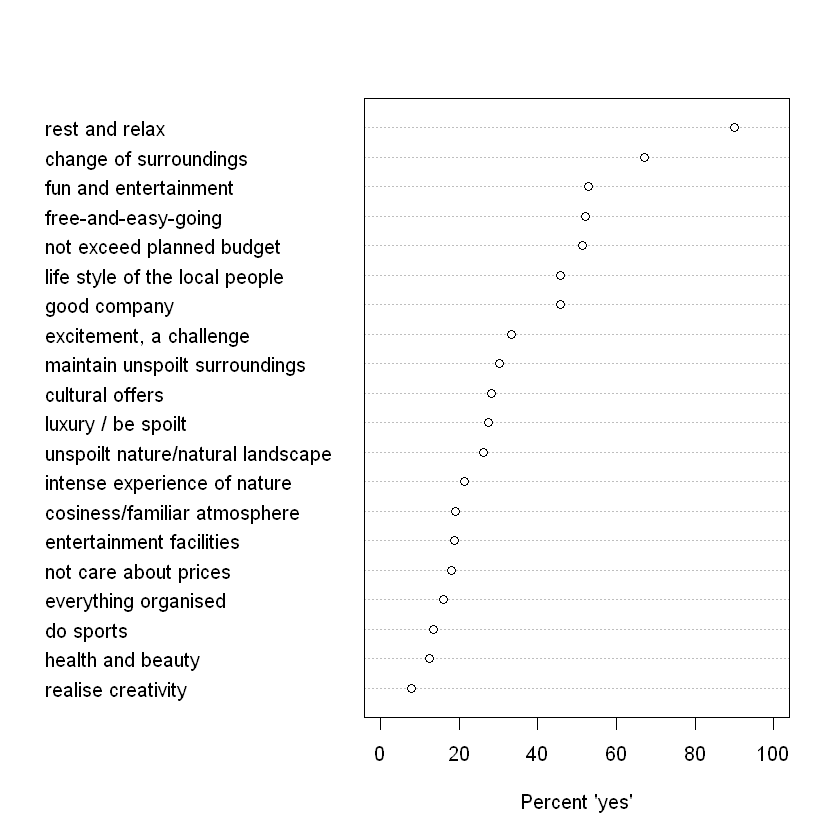

In [12]:
## below we are visualizing the percentages of agreement with the travel motives contained in the last 20 columns of the dataset

## we first of all such for the string "yes" which means that the motives apply,the colmeans calculates the mean number of "yes"
##  for each column 
yes <- 100 * colMeans(vac[,13:32] == "yes")

## we then sort the mean percentages and plot them on a dotchart

dotchart(sort(yes),xlab = "Percent 'yes'", xlim = c(0,100))

## Pre-processing

In [13]:
## after sorting the Income column we can observe that only a small number of people have incomes of above $120k 
## Infact the top 3 income categories contain only between 10 and 15 people which corresponds to only 1 - 1.5% of the total 
##  dataset

sort(table(vac$Income))


$210,001 to $240,000   more than $240,001 $180,001 to $210,000 
                  10                   11                   15 
$150,001 to $180,000 $120,001 to $150,000  $90,001 to $120,000 
                  32                   72                  146 
   Less than $30,000   $60,001 to $90,000   $30,001 to $60,000 
                 150                  233                  265 

In [14]:
## merging the top income categories results in a new variable which is Income2, which has much more balanced frequencies

table(vac$Income2)

< table of extent 0 >

In [15]:
## below we convert the travel motives to a numeric matrix of 0 for 'No' and 1 for 'YES'

vacmot <- (vac[, 13:32] == "yes") + 0 

In [16]:
## we can also scale the numeric matrix above and standardize the values 

vacmot.scaled <- scale(vacmot)

## Principal Component Analysis

In [17]:
## below we will generate a principal components analysis for the australian travel motives dataset:

vacmot.pca <- prcomp(vacmot)


## the output is the standard deviations of the principal components
vacmot.pca

Standard deviations (1, .., p=20):
 [1] 0.8123768 0.5735039 0.5285558 0.5094231 0.4695718 0.4549552 0.4314122
 [8] 0.4197407 0.4054634 0.3754545 0.3638569 0.3596946 0.3484495 0.3320907
[15] 0.3283236 0.3196988 0.3059506 0.2974572 0.2813886 0.2434328

Rotation (n x k) = (20 x 20):
                                          PC1          PC2          PC3
rest and relax                    -0.06277267  0.011968683  0.134476275
luxury / be spoilt                -0.10920691  0.393220137 -0.116667935
do sports                         -0.09455162  0.145580945 -0.045647512
excitement, a challenge           -0.27740140  0.222698527 -0.210311857
not exceed planned budget         -0.28553655 -0.156119478  0.583064849
realise creativity                -0.10951057 -0.012162975 -0.015277762
fun and entertainment             -0.27924352  0.520509339  0.086515129
good company                      -0.28435966 -0.009653647  0.129145586
health and beauty                 -0.13972865  0.050941101  0.003911895

In [18]:
## we can gain further info on the fitted object with the summary function

print(summary(vacmot.pca),digits  = 2)

## we are able to interpret the output as follows
## -> looking at the proportion of variance we can see that PC1 explains about 18% of the variance in the data and PC2 about 27%
##  ->  together they first 2 principal components explain about 27% of the variance in the data whilst PC 3- 15 explains only 
##        between 8% and 3% of the original variation


## -->  the fact that the first FEW principal components do not explain much of the variance indicate the original items
##        (survey questions) are needed as segmantation variables  

Importance of components:
                        PC1  PC2   PC3   PC4  PC5   PC6   PC7   PC8   PC9  PC10
Standard deviation     0.81 0.57 0.529 0.509 0.47 0.455 0.431 0.420 0.405 0.375
Proportion of Variance 0.18 0.09 0.077 0.071 0.06 0.057 0.051 0.048 0.045 0.039
Cumulative Proportion  0.18 0.27 0.348 0.419 0.48 0.536 0.587 0.635 0.681 0.719
                        PC11  PC12  PC13 PC14 PC15  PC16  PC17  PC18  PC19
Standard deviation     0.364 0.360 0.348 0.33 0.33 0.320 0.306 0.297 0.281
Proportion of Variance 0.036 0.035 0.033 0.03 0.03 0.028 0.026 0.024 0.022
Cumulative Proportion  0.756 0.791 0.824 0.85 0.88 0.912 0.938 0.962 0.984
                        PC20
Standard deviation     0.243
Proportion of Variance 0.016
Cumulative Proportion  1.000


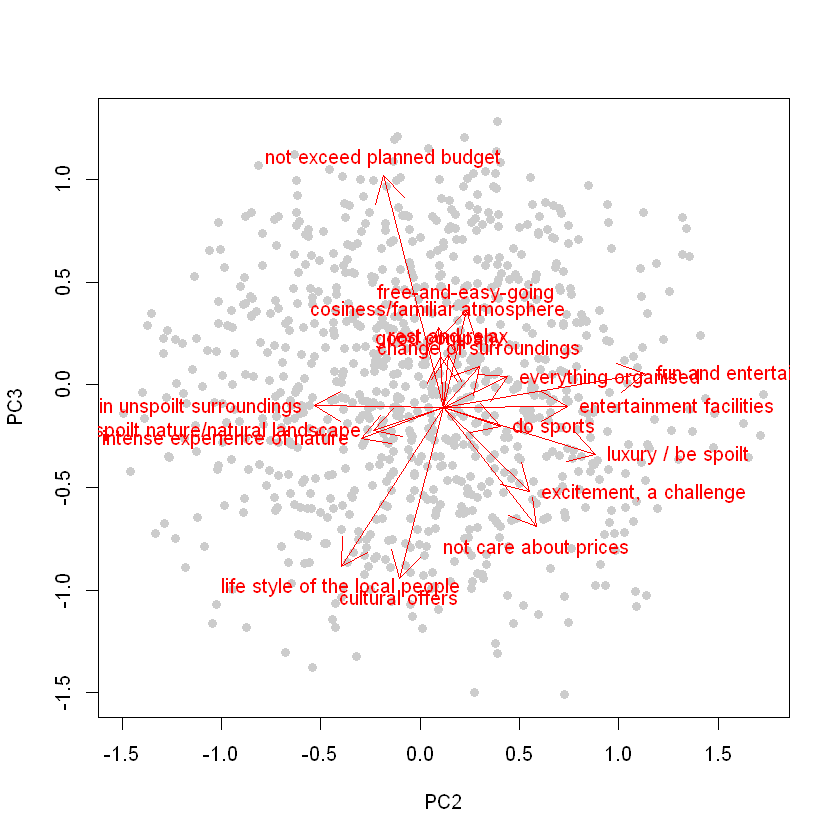

In [19]:
## -->  we will now plot the data in 2-D space,we can observe from the rotation matrix that PC1 does not differentiate well
##        between motives because all motives load on it negatively.

##  -->  PC2 and PC3 display a more differentiated loading pattern of motives.we will use PC 2 and 3 



plot(predict(vacmot.pca)[,2:3], pch = 16,col = "grey80")
projAxes(vacmot.pca,which = 2:3)

# Grouping Consumers

In [20]:
## -> we mostly use distance measures(specifically euclidean distance measures) to calculate distances and thus be able to 
##     segment variables in consumer analyis.
## -> to be able to calculate distances in R we use the "dist()" function 

data("annabill",package = "MSA")

D1 <- dist(annabill)

round(D1,2)

## above we have calculated euclidean distances for 6 tourists based on percentage of time spent on 3 activites


          Anna   Bill  Frank  Julia  Maria Michael
Bill      0.00                                    
Frank    56.57  56.57                             
Julia    42.43  42.43  50.99                      
Maria    28.28  28.28  48.99  14.14               
Michael 134.91 134.91  78.74 115.76 120.83        
Tom      61.64  61.64  37.42  28.28  37.42   88.32

In [21]:
D2 <- dist(annabill, method = "manhattan")

## below is the same matrix as the one above except we have used manhattan distance or absolute distance
D2

        Anna Bill Frank Julia Maria Michael
Bill       0                               
Frank     80   80                          
Julia     60   60    80                    
Maria     40   40    80    20              
Michael  200  200   120   180   180        
Tom      100  100    60    40    60     140

In [22]:
## we are going to be using the cluster library and use the function 'daisy'  to calculate the dissimalirity matrix between
##   observations contained in a data frame.All variables are rescaled between a range of [0,1] 

round(daisy(annabill), digits = 2)

Dissimilarities :
          Anna   Bill  Frank  Julia  Maria Michael
Bill      0.00                                    
Frank    56.57  56.57                             
Julia    42.43  42.43  50.99                      
Maria    28.28  28.28  48.99  14.14               
Michael 134.91 134.91  78.74 115.76 120.83        
Tom      61.64  61.64  37.42  28.28  37.42   88.32

Metric :  euclidean 
Number of objects : 7

## Hierarchical Clustering

In [23]:
## ->  next we are going to attempt Hierarchical Clustering 
##  ->  The data is a survey of Australian residents who had undertaken atleast one personal holiday in the past 12 months   
##   -> The dataset contains 563 respodents who state how often they take risks on a scale of "1 = never, 5 = very often."


data("risk", package = "MSA")

dim(risk)

[1] 563   6

In [24]:
## -> By using the colMeans function we can observe the mean values for all columns are close to 2 which corresponds to 
##     (=rarely)

colMeans(risk)

Recreational       Health       Career    Financial       Safety       Social 
    2.190053     2.396092     2.007105     2.026643     2.266430     2.017762

In [25]:
## -> The following commands below extract market segments using Manhattan distance and complete linkage

risk.dist <- dist(risk, method = "manhattan")

risk.hcl <-  hclust(risk.dist,method = "complete")

risk.hcl


Call:
hclust(d = risk.dist, method = "complete")

Cluster method   : complete 
Distance         : manhattan 
Number of objects: 563 


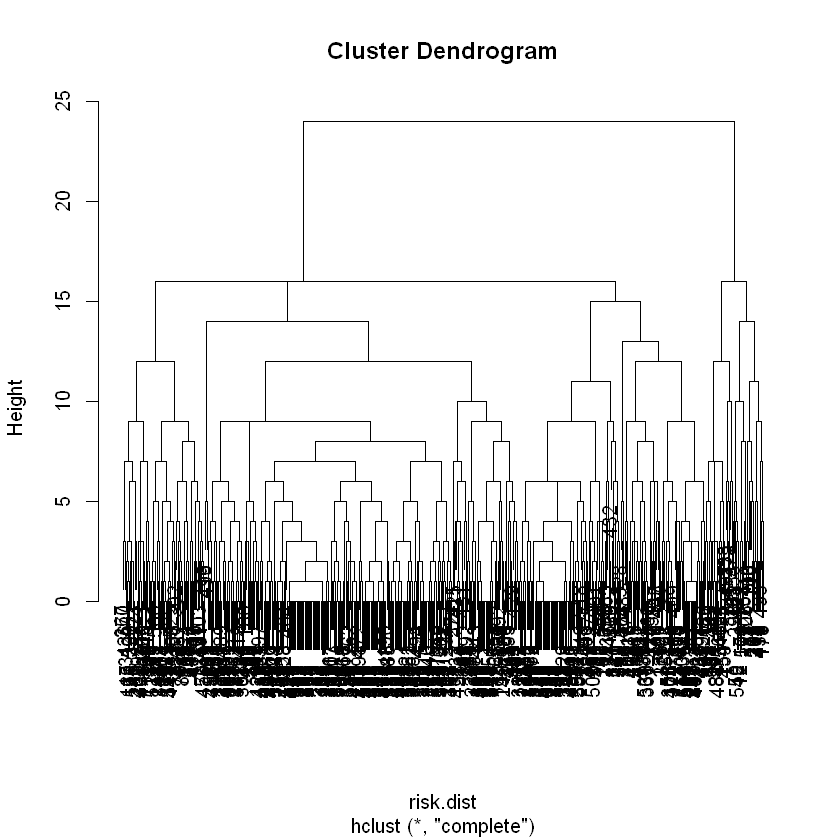

In [26]:
## -> By plotting the results we can observe 6 different segments occuring at a height of 15 on the y-axis 



plot(risk.hcl)

In [27]:
## -> we can observe which consumers have been assighned to which segment by using the fucntion "cutree" which takes an object
##     returned by hclust and either the height (h) at which to cut the tree or the number of (k) segments to cut the tree into

c2 <- cutree(risk.hcl, h = 20)

table(c2)

## The number of segments returned below when cutting the tree at a height of 20

c2
  1   2 
511  52 

In [28]:
c6 <- cutree(risk.hcl, k = 6)

table(c6)

## -> the number of segments (k) returned

c6
  1   2   3   4   5   6 
 90 275  27  25  74  72 

In [29]:
# -> A simple way to assess the characteristics of the clusters is to look at the column wise means by cluster

c6.means <- aggregate(risk,list(Cluster = c6), mean)

round(c6.means, 1)



Cluster,Recreational,Health,Career,Financial,Safety,Social
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.0,2.2,1.9,2.0,2.2,2.8
2,1.9,1.8,1.5,1.6,2.0,1.4
3,3.9,4.4,2.9,3.2,3.3,4.1
4,4.1,3.3,4.1,2.8,3.4,3.2
5,2.3,2.6,3.2,2.6,2.6,2.2
6,2.0,3.8,1.8,2.4,2.3,2.0


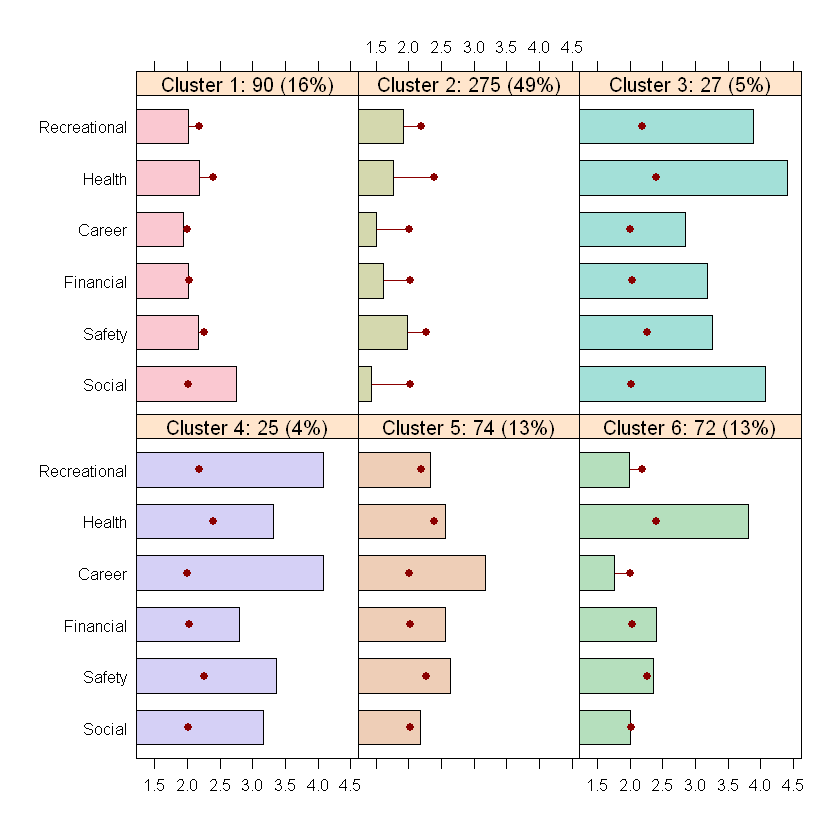

In [30]:
## -> we can also visualize the column-wise means by clusters

barchart(risk.hcl,risk,k = 6)

## -> the dark red dots correspond to the total mean values accross all respondents
## -> the bars indicate mean values within each one of the segments
## -> segments are interpreted by inspecting the difference between the total population(red dots) and the segments (bars)

* The interpretation for the chart above indicates that the largest segment(cluster 2) has people who avoid all types of risk


* Segment 3 and 4 display above average risk taking in all areas,while segments 1,5 and 6 have average risk taking values for 5 of the 6 categories,but are characterised by their willingness to take above average risk in one category


* Members of segment 1 are more willing to accept social risks than the overall population,members of segment 5 are more willing to accept career risks,and members of segment 6 are more willing to accept health risks

## K-Means and K-Centroid Clustering

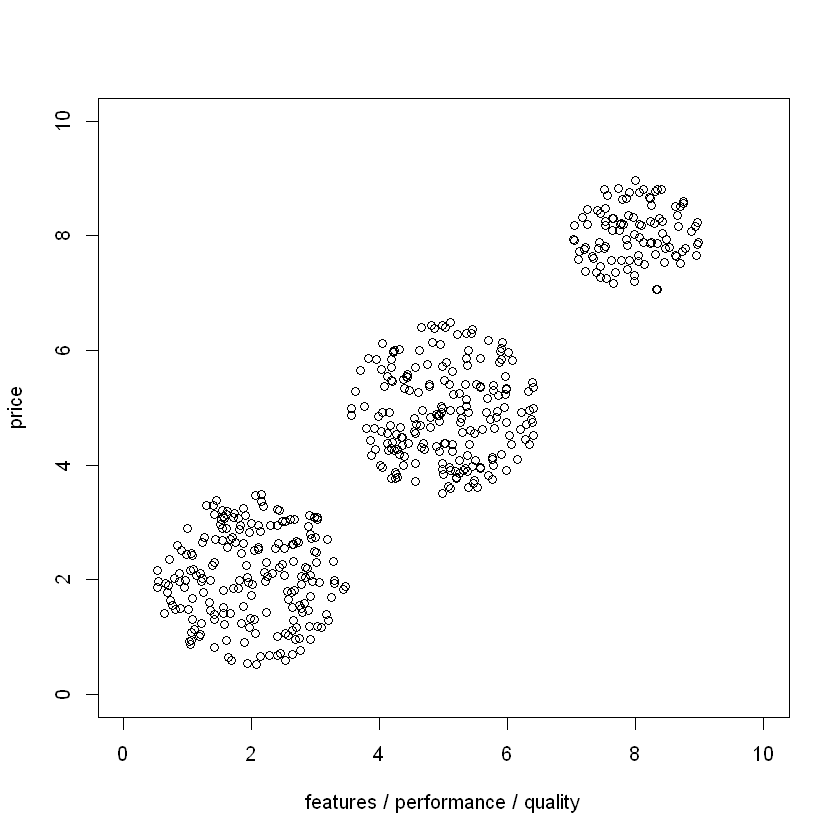

In [31]:
## -> This function can be implemented using the 'kmeans()' function in R

## -> Below we are going to generate data with 2 axis containing:the number of features they want in a mobile phone,and the
##    they are willing to pay for it

set.seed(1234)
PF3 <- priceFeature(500,which = "3clust")


## -> we can observe the generated data below and see that members on the bottom left want a cheap phone with limited features
## ->  members of the middle segment expect to pay a little bit more and expect a few additional features and members of the
##       segment located in the top right corner are willng to pay a lot of money,but have very high expectations in terms of 
##        features

plot(PF3)

In [32]:
## -> we will now proceed to use function 'cclust()' instead of 'kmeans()' because it returns richer objects which are useful
##     for visualization

PF3.km3 <- cclust(PF3, k= 3)

PF3.km3

## -> we can observe the cluster sizes that have been generated using Euclidean distance

kcca object of family 'kmeans' 

call:
cclust(x = PF3, k = 3)

cluster sizes:

  1   2   3 
200 100 200 


In [33]:
## ->  The cluster centers and the vectors of the cluster memberships can be extracted using the "parameters()" function

parameters(PF3.km3)

## -> we can observe that cluster 1 corresponds to the mid tier segment,while cluster 2 corresponds to the high end segment
##    whilst cluster 3 corresponds to the low tier segments based off of the centroids (cluster means) returned

features / performance / quality,price
5.021999,4.881439
7.976827,8.027105
1.990105,2.062453


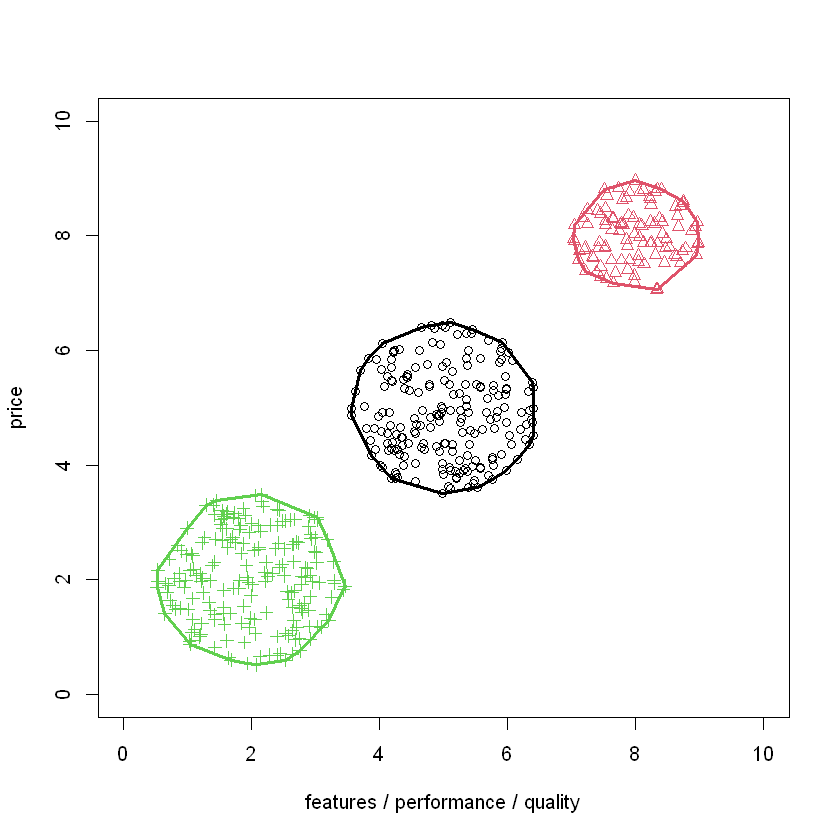

In [34]:
## -> we can also draw a convex hull which is a polygon connecting the outer points of the set located within the polygon

## ->  we use function clusterhull() from package MSA to achieve this

clusterhulls(PF3, clusters(PF3.km3))

In [35]:
## -> specifying the number of segements is difficult because consumer data does not contain distinct, well separated naturally
##     existing market segments

## -> a popular approach is to repeat the clustering procedure for different numbers of market segments,and then compare,across
##      those solutions,the sum of distances of all observations to their representative

## -> below we will calculate 10 runs of the k-means algorithm using function 'stepcclust' with number of segments varying from
##     2 to 8 

PF3.km28 <- stepcclust(PF3,k = 2:8, nrep = 10)

PF3.km28

2 : * * * * * * * * * *
3 : * * * * * * * * * *
4 : * * * * * * * * * *
5 : * * * * * * * * * *
6 : * * * * * * * * * *
7 : * * * * * * * * * *
8 : * * * * * * * * * *


stepFlexclust object of family 'kmeans' 

call:
stepcclust(PF3, k = 2:8, nrep = 10)

  iter converged   distsum
1   NA        NA 1434.6462
2    7      TRUE  827.6455
3    2      TRUE  464.7213
4   12      TRUE  417.2226
5   22      TRUE  371.7285
6   14      TRUE  334.5255
7   17      TRUE  303.8534
8   21      TRUE  285.2269

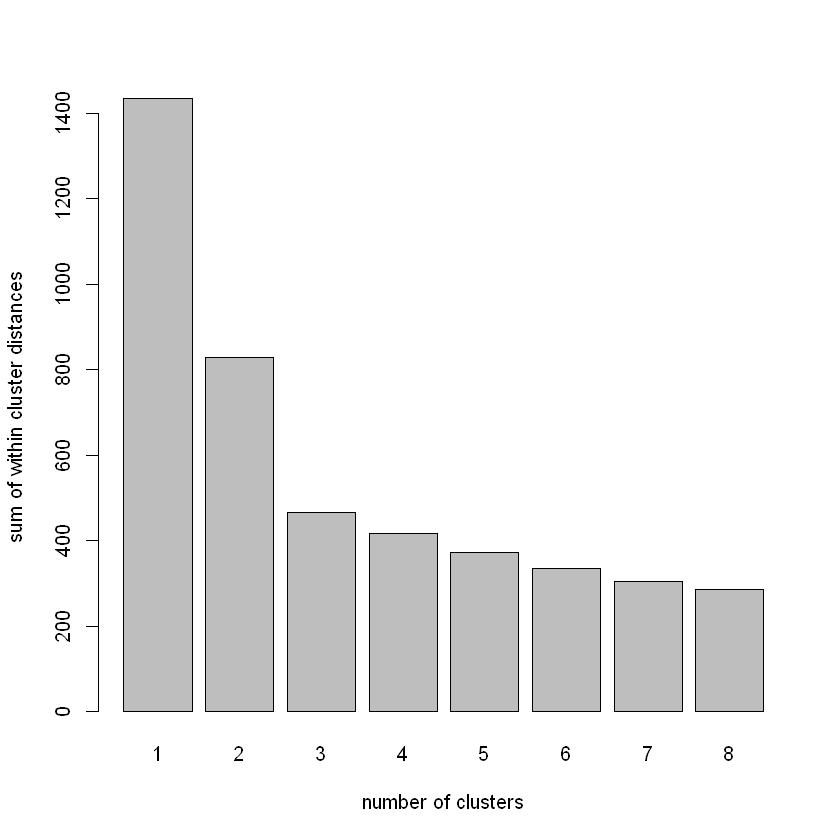

In [36]:
## -> The scree plot below shows distinct drops in the sum of within cluster distances for the first numbers of segments
##     followed only by small decreases afterwards

## -> The point of the scree plot indicating the best number of segments is where an 'elbow' occurs which is the segment where 
##      the drops in the sum of within cluster distances start to become too small to notice

## -> The scree plot only provides guidance if market segments are well-separated.If they are not, stability analysis can inform
##     the number of segment decision

plot(PF3.km28)

2 : * * * * * * * * * *
3 : * * * * * * * * * *
4 : * * * * * * * * * *
5 : * * * * * * * * * *
6 : * * * * * * * * * *
7 : * * * * * * * * * *
8 : * * * * * * * * * *


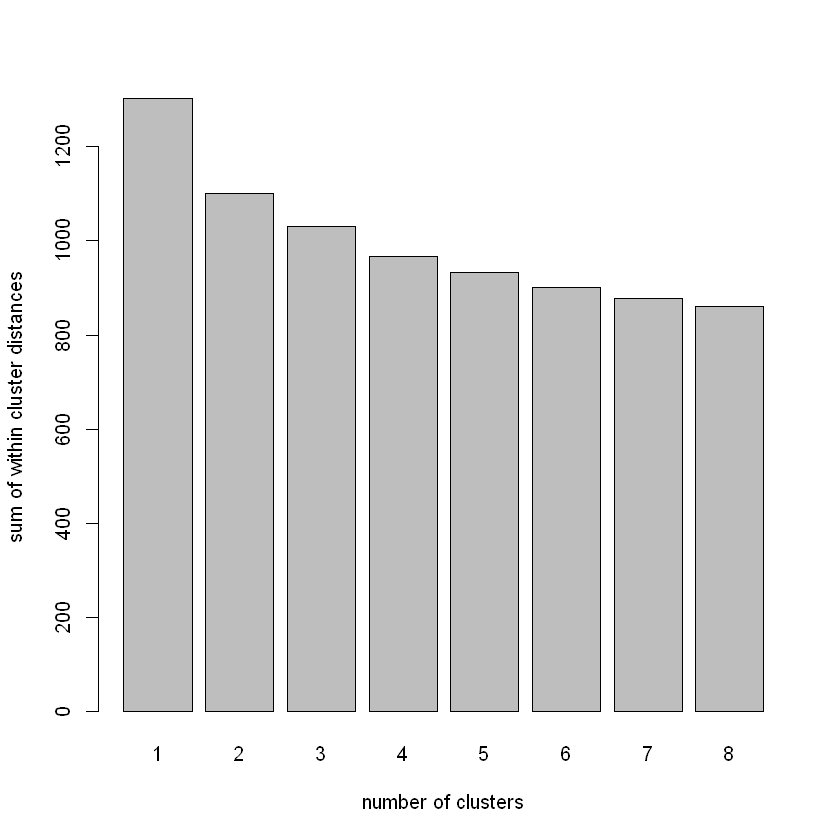

In [37]:
## -> below is the resulting scree plot for the vacation risk dataset which contains real consumer data

## -> No obvious number of segments recommendation emerges from this plot,but if it were the only available decision tool,the
##     two-segment solution would be chosen 

## -> The solution containing 2-market segments splits the data into risk-averse people and risk-takers,reflecting the 2 main 
##      branches of the dendogram we did above

set.seed(1234)

risk.km28 <- stepcclust(risk,k = 2:8,nrep = 10)

plot(risk.km28)

### Bagged Clustering

* Bagged Clustering combines hierarchical clustering algorithms and partitioning algorithms but adds bootstrapping


* Bootstrapping is implemented by random drawing which is the process of extracting segments with randomly drawn samples of the data


* Bootstrapping has the advantage of making the final segmentation solution less dependent on the exact people contained in consumer data


* The first step in bagged clustering is clustering the bootstrapped data-sets using a partitioning algorithm.Next we discard the original data-set and all bootstrapped data-sets where we will be left with only the cluster centroids which we save and will serve as our data-sets for the second step:hierachical clustering

* The resulting dendogram may provide clues about the best number of market segments to extract


* Bagged Clustering is suitable if :
*  - If we suspect the existence of niche markets
*  - If we fear that standard algorithms might get stuck in bad local solutions
*  - If we prefer hierarchical clustering,but the data-set is too large


* Bagged clustering is an example of an ensemble clustering method,which are called so because they combine several segmentation solutions into one. They are also called 'committees'




In [38]:
## -> We will use the Austrian winter tourist destination to identify market segments based off of their vacation activities

## -> we will first load the data and check the variables

data("winterActiv",package = "MSA")

colnames(winterActiv)

[1] "alpine skiing"            "cross-country skiing"    
 [3] "snowboarding"             "carving"                 
 [5] "ski touring"              "ice-skating"             
 [7] "sleigh riding"            "tennis"                  
 [9] "horseback riding"         "going to a spa "         
[11] "using health facilities"  "hiking"                  
[13] "going for walks"          "organized excursions"    
[15] "excursions"               "relaxing"                
[17] "going out in the evening" "going to discos/bars"    
[19] "shopping"                 "sight-seeing"            
[21] "museums"                  "theater/opera"           
[23] "heurigen"                 "concerts"                
[25] "tyrolean evenings"        "local events"            
[27] "pool/sauna"

In [39]:
## -> we run bagged clustering using 'bclust()' function from 'flexclust' package and specify (k = 10) market segments and 
##     (base.iter = 50) bootstrap samples

set.seed(1234)

winter.bc <- bclust(winterActiv,base.k = 10, base.iter = 50)

Committee Member:
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50
Computing Hierarchical Clustering


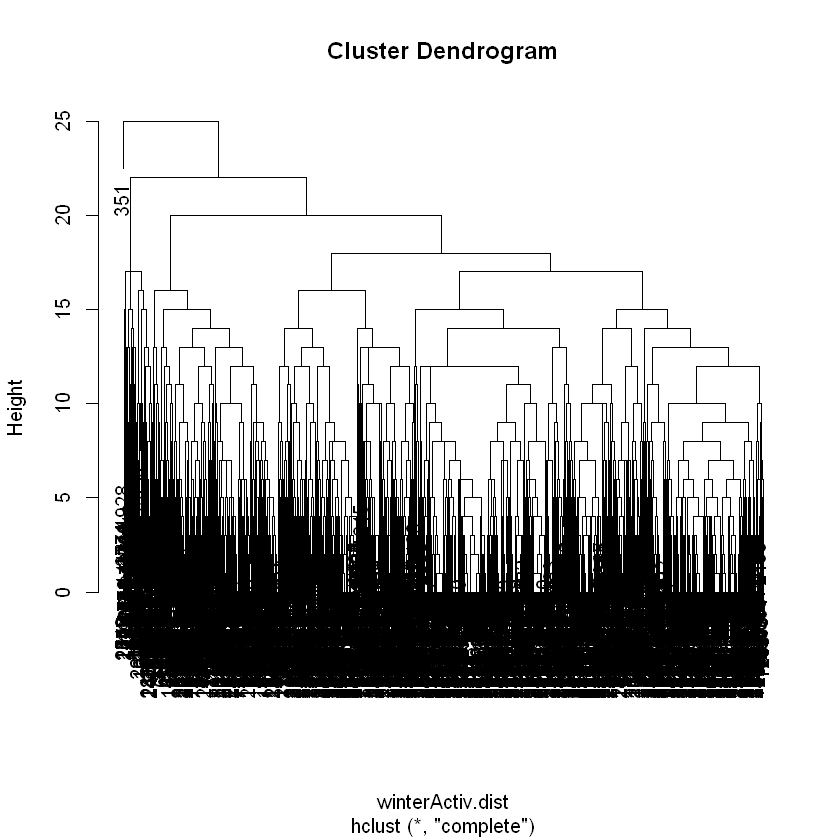

In [40]:
winterActiv.dist <- dist(winterActiv, method = "manhattan")

winterActiv.hcl <-  hclust(winterActiv.dist,method = "complete")

plot(winterActiv.hcl)

## -> Below is a dendogram for bagged cluster analysis of the winter vacation activities data-set

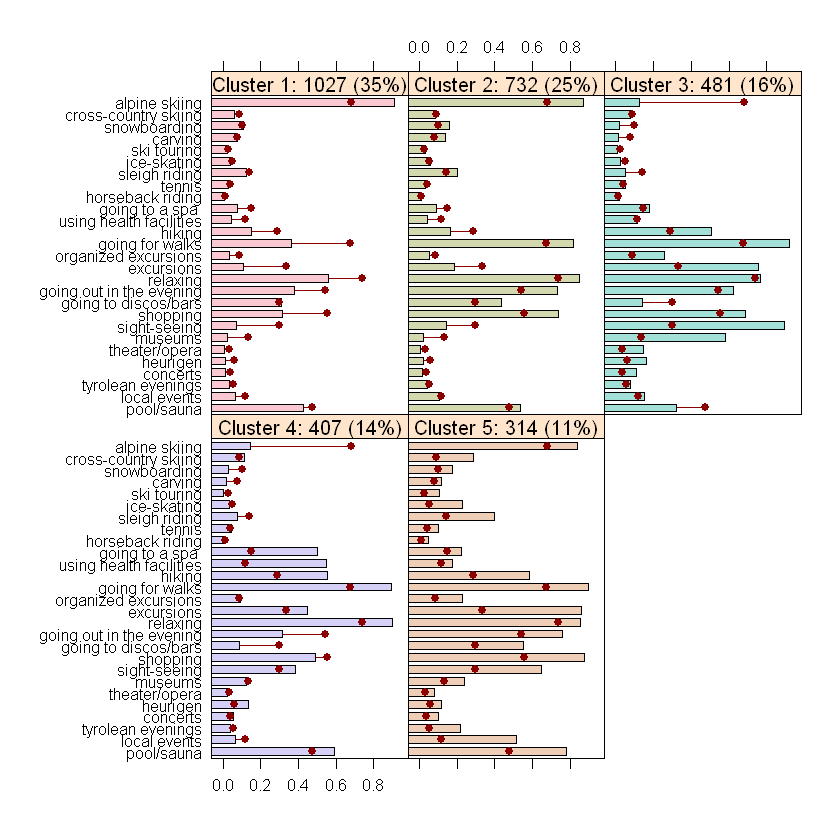

In [41]:
## -> A barchart of cluster means from the bagged cluster analysis of the winter vacation activities data set
## -> here we can observe that the largest segment(cluster1) contains more than one third of all tourists in the sample whilst
##     the smallest segment contains only 11%

## -> the smallest segment is peculiar in that it contains above average agreement with all vacation activities.As such their is
##     a risk that this segment may capture an acquiescence response style(the tendency of respondents to agree with everything
##         they are asked)

## -> taking a look at cluster 3,we can observe a very interesting characteristic in that members of this segment rarely go
##      skiing.Instead a large proportion of them goes for "walks" or "sight-seeing" as well as "excursions" which seems to
##      suggest that this segment represents a more "outdoorsy" kind of tourist

## -> taking a look at cluster we might see behaviours corresponding with tourists who are taking a vacation to "mostly relax"
#      as can be noted by their above average agreement with "going out in the evening", "relaxing", "going out to discos/bars"
#      and "alpine skiing"

##-> whilst the largest segment(cluster 1) seems to display characterestics of a segment who correspond with 'adventure seeking'
#    or "sport" tourists as can be observed from their high agreement with alpine skiing but below average agreement with all
#     other activities especially "relaxing"

barchart(winter.bc,k = 5)

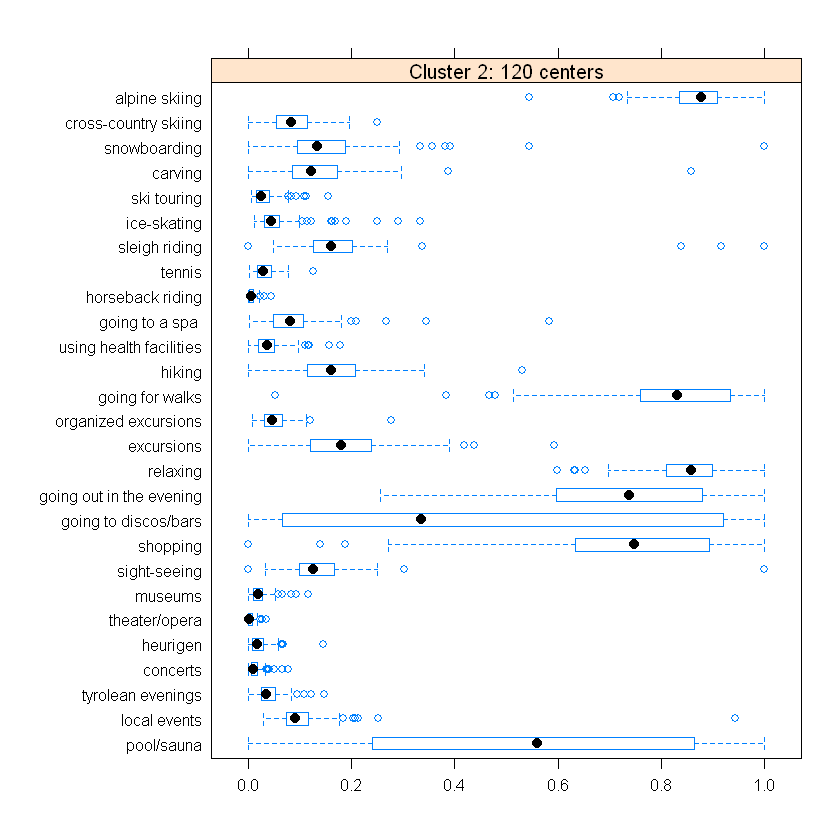

In [42]:
## -> below is a boxplot for cluster centres from bagged cluster analysis for segment 5 of the winter vacation activities 

## -> to interpret this we say that if the cluster centres are spread across the full width of the plot for a specific vacation
##    activity,it indicates that the market segment is not vey distinct with repsect to this activity.however,if all cluster
##     centres are lumped together,this is key characteristic of this particular market segment

bwplot(winter.bc,k = 5,clusters = 2)

## Model based methods


* The model based methods used in this section are called finite mixture models because the number of market segments is finite
    and the overall model is a mixture of segment specific models

Package 'mclust' version 5.4.9
Type 'citation("mclust")' for citing this R package in publications.



'Mclust' model object: (VII,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

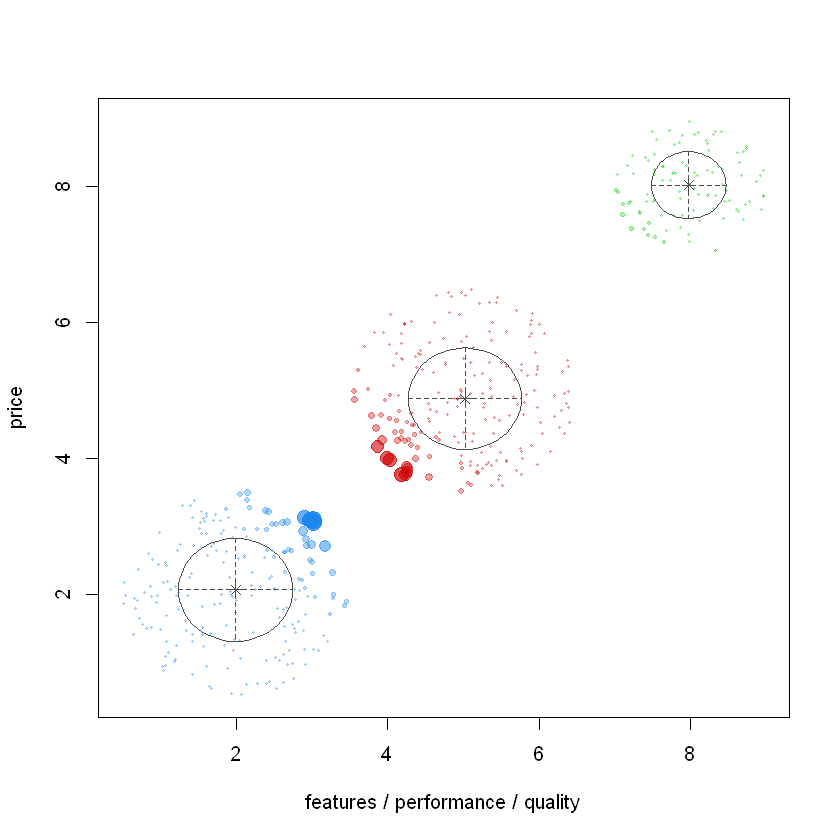

In [43]:
set.seed(1234)

pf3 <- priceFeature(500,which = "3clust")

library(mclust)

pf3.m28 <- Mclust(pf3,G = 2:8)

pf3.m28

plot(pf3.m28,what = "uncertainty")

* The plot generated above is called an "uncertainty plot".
* The colours indicate segment assignments with larger solid coloured bubbles having higher assignment uncertainty

* For a more practical guide let use the australian vacation motives dataset

In [44]:
## we first load the dataset
data("vacmot", package = "flexclust")
vacmet <- vacmotdesc[,c("Obligation","NEP","Vacation.Behaviour")]
vacmet <- na.omit(vacmet)

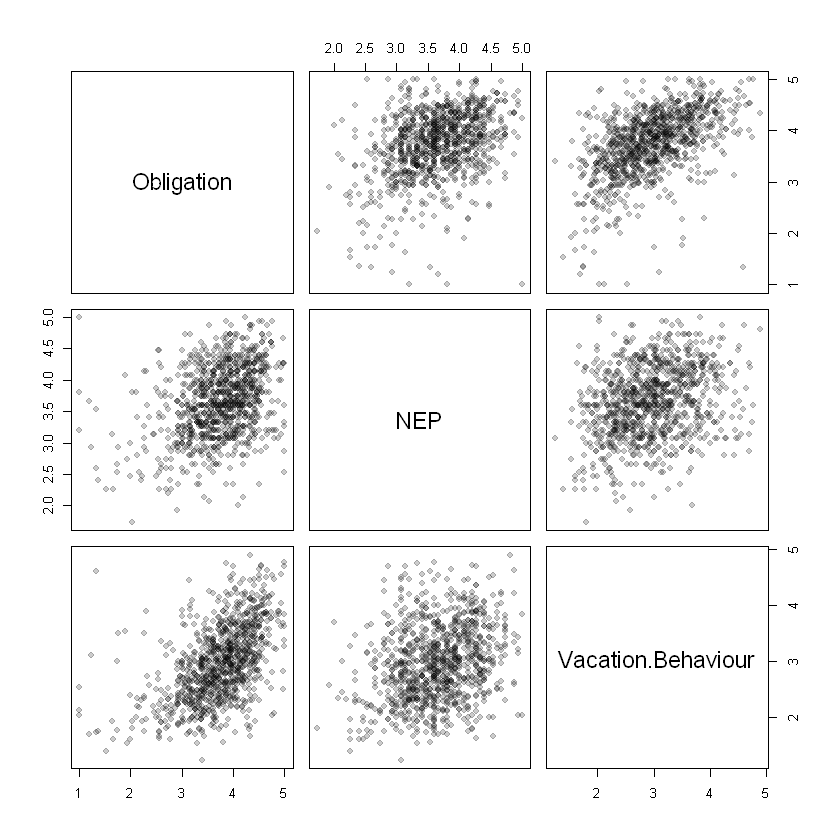

In [45]:
## we then visualize the data

pairs(vacmet,pch = 19,col = rgb(0,0,0,0.2))

## we find that no clearly separated segments exist in the data

In [46]:
## Mclust gits all 14 covariance matrix models by default,and returns the best model with respect to the BIC

vacmet.m18 <- Mclust(vacmet,G = 1:8)

vacmet.m18

'Mclust' model object: (VEE,2) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

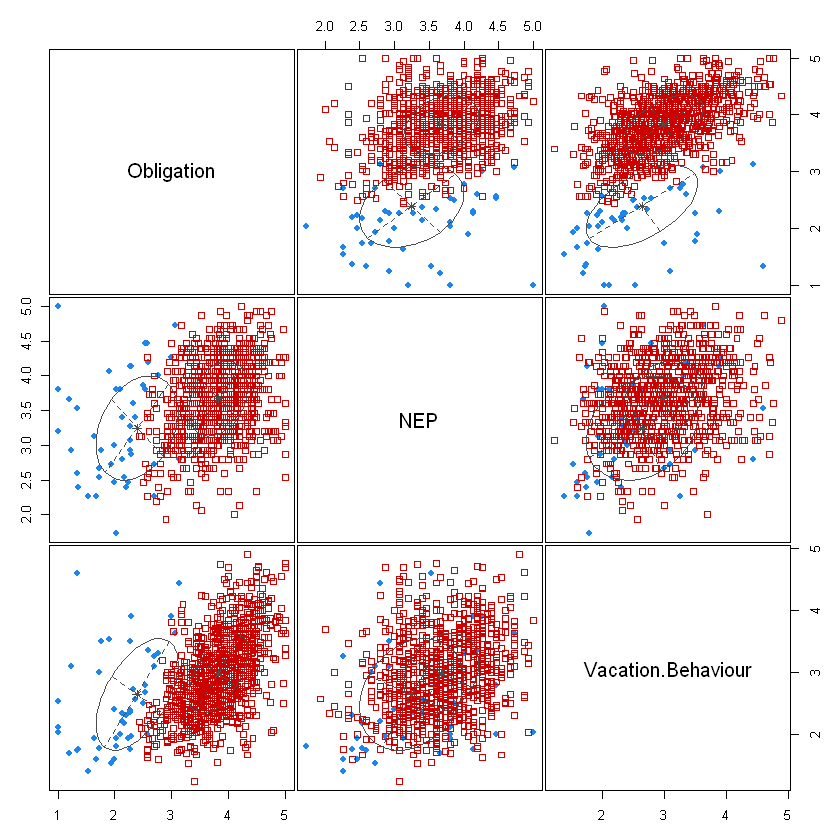

In [47]:
plot(vacmet.m18,what = "classification")

# below is a classification plot of the mixture of normal distributions for the australian travel motives data set selected 
#  using the BIC among all covariance models

* Using mixtures of normal distributions means the data points are not assgned to the segment where the mean is closest in Euclidean space(like in k-means clustering).Rathe,the distance induced by the covariance matrices  is used and the segment sizes are taken into account

### Binary Distributions

* For binary data,finite mixtures of binary distributions,sometimes called latent class models/analysis are used

* We will use the dataset containing winter activities of Austrian tourists

In [59]:
## we will first investigate the observed frequency patterns for the variables "Alpine skiing" and "sight seeing"

data("winterActiv", package="MSA")

winteractiv2 <- winterActiv[,c("alpine skiing",  "sight-seeing")]

table(as.data.frame(winteractiv2))

## we can observe of the 2961 respondents, only 355(12%) stated they engaged in both activities
## if the 2 activities were not associated, we would expect this percentage to be much higher

             sight-seeing
alpine skiing    0    1
            0  416  527
            1 1663  355

In [58]:
p <- colMeans(winteractiv2)


round(prod(p) * 100)

## the expected percentage od 20%

[1] 20

In [68]:
n <- nrow(winteractiv2)

expected <- function(p){
    
    res<- outer(c(1-p[1],p[1]), c(1 - p[2], p[2])) +
    dimnames(res <- setNames(rep(list(c("0","1")),2),
                            +names(p))
           + res 
             }
                                                            
                                                            
round(n*expected(p))                             

ERROR: Error in parse(text = x, srcfile = src): <text>:9:14: unexpected '}'
8:            + res 
9:              }
                ^


In [69]:
library(flexmix)

winteractiv2.m2 <- flexmix(winteractiv2 ~ 1,k= 2,model = FLXMCmvbinary())

ERROR: Error in library(flexmix): there is no package called 'flexmix'
